In [268]:
from os.path import isfile, join
import matplotlib.pyplot as plt
from os import listdir
import pandas as pd
import numpy as np
import os

In [269]:
files = [f for f in listdir(".") if isfile(join(".", f))]
files.remove("visualize_csv.ipynb")
files.remove('csvconvert.py')
files

['mao.R.csv',
 'pe.L.csv',
 'canela.R.csv',
 'cabeca.csv',
 'pelvis.csv',
 'clavicula.L.csv',
 'femur.R.csv',
 'pontape.L.csv',
 'antebraco.L.csv',
 'braco.R.csv',
 'clavicula.R.csv',
 'canela.L.csv',
 'torax.csv',
 'antebraco.R.csv',
 'respiracao.csv',
 'femur.L.csv',
 'pe.R.csv',
 'abdomen.csv',
 'braco.L.csv',
 'pontape.R.csv',
 'pescoco.csv']

In [270]:
part = "braco.R" 
data = pd.read_csv("{}.csv".format(part))
data

,LinAccel: x,y,z,AngVel: x,y.1,z.1,Magnetometer: x,y.2,z.2,time,name
0,9.952254e-06,0.006821,0.001165,0.000000,0.000000,0.000000,0,0,0,0.020000,braco.R
1,-1.050958e-06,-0.000720,-0.000123,0.000000,0.000000,0.000000,0,0,0,0.353333,braco.R
2,2.265124e-07,0.000155,0.000027,0.000000,0.000000,0.000000,0,0,0,0.533224,braco.R
3,5.885673e-07,0.000403,0.000069,0.000000,0.000000,0.000000,0,0,0,0.638884,braco.R
4,4.236488e-06,0.002904,0.000496,0.000000,0.000000,0.000000,0,0,0,0.684933,braco.R
5,-1.751882e-06,-0.001201,-0.000205,0.000000,0.000000,0.000000,0,0,0,0.758116,braco.R
6,2.051886e-06,0.001406,0.000240,0.000000,0.000000,0.000000,0,0,0,0.807914,braco.R
7,3.754926e-06,0.002574,0.000440,0.000000,0.000000,0.000000,0,0,0,0.843140,braco.R
8,-2.691056e-06,-0.001844,-0.000315,0.000000,0.000000,0.000000,0,0,0,0.893412,braco.R
9,2.826161e-07,0.000194,0.000033,0.000000,0.000000,0.000000,0,0,0,0.941610,braco.R


In [277]:
def drop(data, sort, percent=0.06, by_axis=False):
    to_drop = []
    i = 0
    while i < len(sort) * percent:
        to_drop.append(sort[i][0])
        i += 1
    
    return data.drop(data.index[to_drop])
#     return data

def filter_data(data, key, percent=0.03, by_axis=False):
#     return data
    if by_axis:
        y = data.iloc[:,key]
    else:
        y = data[key]
        
    x = range(len(y))
    xy = list(zip(x, y))
    
    #should sort by abs of derivative
    sort = sorted(xy, key=lambda tup: tup[1], reverse=True)
    data = drop(data, sort, percent=percent)
    data.reset_index(drop=True)
    if by_axis:
        y = data.iloc[:,key]
    else:
        y = data[key]
        
    x = range(len(y))
    xy = list(zip(x, y))
    sort = sorted(xy, key=lambda tup: tup[1], reverse=True)
    
    if not by_axis:
        key = data.columns.get_loc(key)
    
#     i = 0
#     while i < len(y) * percent:
#         row = sort[i][0]
#         if (row == len(xy) - 1):
#             data.iloc[row, key] = data.iloc[row - 1, key]
#         elif (row == 0):
#             data.iloc[row, key] = data.iloc[row + 1, key]
#         else:    
#             data.iloc[row, key] = 0.5 * (data.iloc[row - 1, key] + data.iloc[row + 1, key])
#         i += 1

    for row in range(len(sort)):
        if row == 0:
            continue
        
        data.iloc[row, key] = (1 - percent) * data.iloc[row, key] + percent * data.iloc[row - 1, key] 
        
    return data
    

In [272]:
def integrate(xy):
    integrals = []
    integrals.append(xy[0][1] * xy[0][0])
    i = -1
    for element in xy:
        if i == -1:
            i += 1
            continue
        
        deltatime = element[0] - xy[i][0]
        integrals.append(element[1] * (deltatime) + integrals[i])
        i += 1
    return integrals

In [273]:
data = filter_data(data, "y.1", percent=0.03)

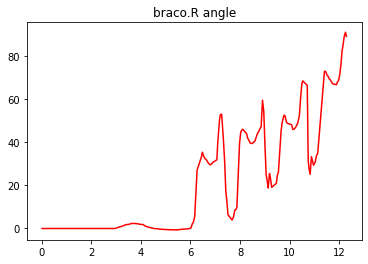

In [274]:
zipped = list(zip(data["time"], data["y.1"]))

plt.plot(data["time"], integrate(zipped), 'r')
plt.title("{} angle".format(part))
plt.show()

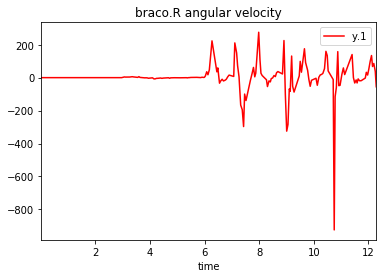

In [275]:
data.plot(kind="line", x="time", y="y.1", color="red")
plt.title("{} angular velocity".format(part))
plt.show()

     LinAccel: x           y           z  AngVel: x       y.1        z.1  \
0      -0.001299    0.004267    0.001150   0.000000  0.000000   0.000000   
1       0.000094   -0.000309   -0.000083   0.000000  0.000000   0.000000   
2      -0.000026    0.000085    0.000023   0.000000  0.000000   0.000000   
3      -0.000075    0.000247    0.000067   0.000000  0.000000   0.000000   
4      -0.000539    0.001769    0.000477   0.000000  0.000000   0.000000   
..           ...         ...         ...        ...       ...        ...   
194  -108.836193 -225.076667  -23.291733   1.734668 -2.483768   1.222242   
195   -11.891917  -30.628850  -24.014225   0.761311  1.798322  -1.194532   
197    54.580914    5.189386   33.493781   1.537257  0.882818  -1.534446   
198  1219.291037 -374.221638  -37.127157  -1.895754 -3.461093 -44.971370   
199   524.029242 -233.850864 -120.032614  -0.256963  0.796158 -61.261608   

     Magnetometer: x  y.2  z.2       time   name  
0                  0    0    0   0.0

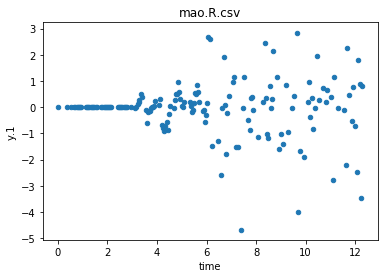

      LinAccel: x           y           z  AngVel: x       y.1       z.1  \
0   -9.230152e-10    0.011857    0.007387   0.000000  0.000000  0.000000   
1    6.685582e-11   -0.000859   -0.000535   0.000000  0.000000  0.000000   
2   -1.837184e-11    0.000236    0.000147   0.000000  0.000000  0.000000   
3   -5.349985e-11    0.000687    0.000428   0.000000  0.000000  0.000000   
4   -3.827280e-10    0.004916    0.003063   0.000000  0.000000  0.000000   
..            ...         ...         ...        ...       ...       ...   
187  2.884360e+02 -765.677914  916.224068  -1.783475 -2.568298 -1.947968   
189  4.848801e+01  -20.293342   43.150846   0.461609  1.650374  0.855906   
190  3.754504e+01    1.356654  -15.785691   0.039153 -0.495728 -0.320570   
191  7.131014e+02   -3.742522 -279.301041  -3.226582 -0.462726  1.070270   
192 -3.633388e+02   15.482880  129.185690  -0.533037 -0.712361 -0.583722   

     Magnetometer: x  y.2  z.2       time  name  
0                  0    0    0   0.02

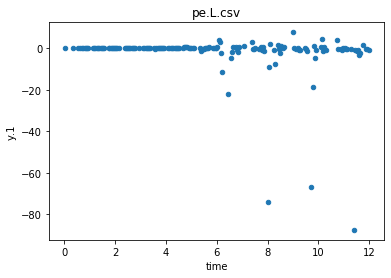

      LinAccel: x           y           z  AngVel: x       y.1        z.1  \
0   -1.272218e-11    0.003385    0.000861   0.000000  0.000000   0.000000   
1    9.214927e-13   -0.000245   -0.000062   0.000000  0.000000   0.000000   
2   -2.532242e-13    0.000067    0.000017   0.000000  0.000000   0.000000   
3   -7.374035e-13    0.000196    0.000050   0.000000  0.000000   0.000000   
4   -5.275247e-12    0.001403    0.000357   0.000000  0.000000   0.000000   
..            ...         ...         ...        ...       ...        ...   
192 -3.123782e+02  260.768351 -107.663874  -0.969551  1.892010 -10.037225   
193 -1.291931e+02 -513.793576  204.307501   4.533750  3.086342  -4.484799   
194 -2.803736e+02  388.254506  349.675677  21.104958  4.580402   9.285027   
195 -2.073872e+02   -0.855587  451.493398  40.032347  8.446735  19.274565   
196  9.562703e+01  114.596807 -212.857272  34.887606  5.297524  16.829762   

     Magnetometer: x  y.2  z.2       time      name  
0                  0 

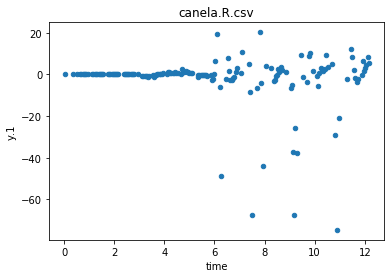

      LinAccel: x            y           z  AngVel: x       y.1       z.1  \
0   -2.467355e-10     0.003492    0.000873   0.000000  0.000000  0.000000   
1    1.787155e-11    -0.000253   -0.000063   0.000000  0.000000  0.000000   
2   -4.911062e-12     0.000070    0.000017   0.000000  0.000000  0.000000   
3   -1.430130e-11     0.000202    0.000051   0.000000  0.000000  0.000000   
4   -1.023088e-10     0.001448    0.000362   0.000000  0.000000  0.000000   
..            ...          ...         ...        ...       ...       ...   
192 -4.003979e+00    88.576852  -27.305319  -0.684904  0.037251  0.060062   
193  9.448467e+00  -158.355128   90.698420  -3.604011  0.251404  0.161811   
196 -8.760817e+00   166.452899 -129.692587 -16.705430  0.078000  0.331811   
197  1.473990e+01  -376.748361  158.888608 -29.025681  0.091170  0.614511   
199 -5.556071e+01  1424.508688 -567.678737 -31.517115  0.260979  0.780604   

     Magnetometer: x  y.2  z.2       time    name  
0                  0   

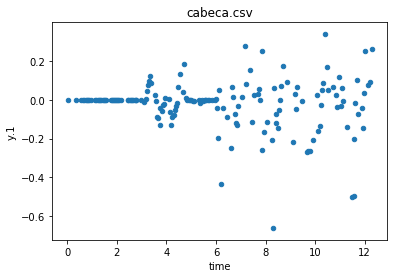

      LinAccel: x           y           z  AngVel: x       y.1       z.1  \
0   -2.390064e-10    0.003417    0.000721   0.000000  0.000000  0.000000   
1    1.731171e-11   -0.000248   -0.000052   0.000000  0.000000  0.000000   
2   -4.757220e-12    0.000068    0.000014   0.000000  0.000000  0.000000   
3   -1.385330e-11    0.000198    0.000042   0.000000  0.000000  0.000000   
4   -9.910388e-11    0.001417    0.000299   0.000000  0.000000  0.000000   
..            ...         ...         ...        ...       ...       ...   
193 -1.956495e+01 -183.350739   48.284656  -0.087052  0.035774 -0.107770   
195 -3.754805e+01 -286.211560   66.366792  -5.970654 -0.087513 -0.124017   
196  2.399007e+01  201.313311  -88.635369  -4.893823 -0.009178 -0.081761   
197 -5.142962e+01 -407.207082  105.730970  -8.372526  0.090409 -0.117664   
198 -1.045549e+02 -776.318774  181.222219 -15.885529  0.222195 -0.043603   

     Magnetometer: x  y.2  z.2       time    name  
0                  0    0    0   0.

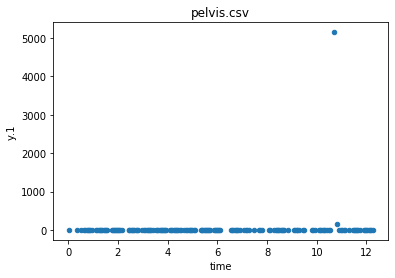

     LinAccel: x            y           z  AngVel: x       y.1        z.1  \
0      -0.000695     0.003371    0.001436   0.000000  0.000000   0.000000   
1       0.000050    -0.000244   -0.000104   0.000000  0.000000   0.000000   
2      -0.000014     0.000067    0.000029   0.000000  0.000000   0.000000   
3      -0.000040     0.000195    0.000083   0.000000  0.000000   0.000000   
4      -0.000288     0.001398    0.000596   0.000000  0.000000   0.000000   
..           ...          ...         ...        ...       ...        ...   
194   108.982984   -88.245484  162.001329 -10.986902 -1.994646  13.972497   
195   150.257761  -156.675508  143.192031 -26.308787 -1.984748  28.670920   
196  -122.573228    91.626041 -157.736725 -20.167759 -0.471206  22.088539   
197   193.217865  -254.953253  175.727862 -35.199578 -0.238448  38.821292   
199  -701.139422  1020.957552 -633.660884 -37.251882  4.254322  42.848148   

     Magnetometer: x  y.2  z.2       time         name  
0                 

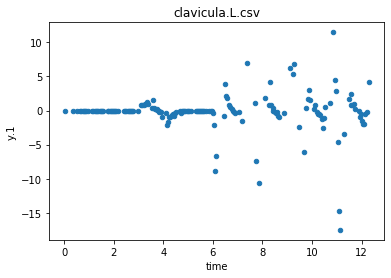

     LinAccel: x           y           z  AngVel: x         y.1         z.1  \
0       0.000000    0.000000    0.000000   0.000000    0.000000    0.000000   
1       0.000000    0.000000    0.000000   0.000000    0.000000    0.000000   
2       0.000000    0.000000    0.000000   0.000000    0.000000    0.000000   
3       0.000000    0.000000    0.000000   0.000000    0.000000    0.000000   
4       0.000000    0.000000    0.000000   0.000000    0.000000    0.000000   
..           ...         ...         ...        ...         ...         ...   
192    67.980023  -40.483848   10.662078  10.504483  171.908369 -169.927229   
194  -125.827626 -227.709234 -696.814616  21.977880   66.163577  -66.559500   
195  -112.074553 -170.916671 -408.212731   9.463877   -0.255432    0.507736   
196    61.993851  128.405901  220.629375  12.245132    7.949329   -7.196508   
197  -114.670164 -189.267063 -150.382021  30.047501   37.310696  -35.859564   

     Magnetometer: x  y.2  z.2       time     name 

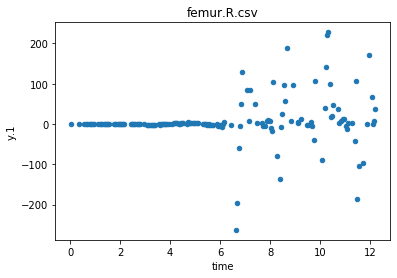

      LinAccel: x           y           z  AngVel: x       y.1       z.1  \
0    3.350248e-09    0.013970    0.006985   0.000000  0.000000  0.000000   
1   -2.426651e-10   -0.001012   -0.000506   0.000000  0.000000  0.000000   
2    6.668386e-11    0.000278    0.000139   0.000000  0.000000  0.000000   
3    1.941872e-10    0.000810    0.000405   0.000000  0.000000  0.000000   
4    1.389179e-09    0.005793    0.002896   0.000000  0.000000  0.000000   
..            ...         ...         ...        ...       ...       ...   
187  2.884402e+02 -765.668952  916.202860  -1.784071 -2.567525 -1.947967   
189  4.848513e+01  -20.294778   43.139945   0.461932  1.650357  0.855906   
190  3.754567e+01    1.359354  -15.787560   0.039163 -0.495728 -0.320570   
191  7.130933e+02   -3.758637 -279.293337  -3.226582 -0.461939  1.070270   
192 -3.633348e+02   15.488081  129.179325  -0.532570 -0.712959 -0.584344   

     Magnetometer: x  y.2  z.2       time       name  
0                  0    0    0  

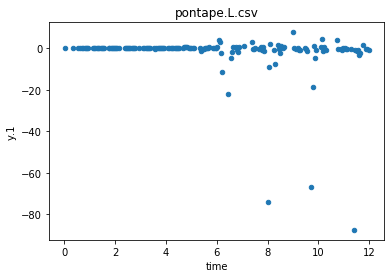

     LinAccel: x            y           z  AngVel: x        y.1         z.1  \
0      -0.003048     0.004931    0.001286   0.000000   0.000000    0.000000   
1       0.000221    -0.000357   -0.000093   0.000000   0.000000    0.000000   
2      -0.000061     0.000098    0.000026   0.000000   0.000000    0.000000   
3      -0.000177     0.000286    0.000075   0.000000   0.000000    0.000000   
4      -0.001264     0.002045    0.000533   0.000000   0.000000    0.000000   
..           ...          ...         ...        ...        ...         ...   
194  -104.187464 -1152.339702  408.368988   8.555752 -22.930206  -58.446371   
195   -73.286888  -929.131933  -12.769033  -2.194358 -36.352565 -105.811305   
196    84.878837   901.943986 -469.623481 -14.475511 -19.099626  -62.853356   
197    15.060481 -1249.055250 -146.049541 -24.013190 -18.602806 -121.693793   
198  -168.955485  -810.835586 -599.395006  44.991242   4.892603 -114.199289   

     Magnetometer: x  y.2  z.2       time         n

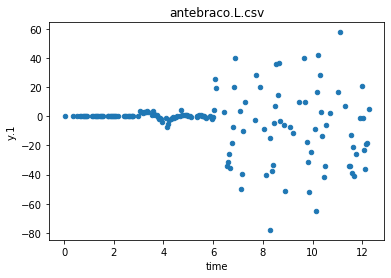

      LinAccel: x           y           z   AngVel: x        y.1         z.1  \
0    9.952254e-06    0.006821    0.001165    0.000000   0.000000    0.000000   
1   -7.208616e-07   -0.000494   -0.000084    0.000000   0.000000    0.000000   
2    1.980912e-07    0.000136    0.000023    0.000000   0.000000    0.000000   
3    5.768530e-07    0.000395    0.000068    0.000000   0.000000    0.000000   
4    4.126699e-06    0.002828    0.000483    0.000000   0.000000    0.000000   
..            ...         ...         ...         ...        ...         ...   
193  3.725343e+01 -119.181157   22.415368  -20.854049  55.411166   62.674128   
194 -5.827786e+00 -150.017790   36.010162  -21.149269  98.492469  101.804580   
196 -4.807577e+01   93.221810   37.536747  -54.552276  67.655711   83.475091   
197 -1.134524e+02 -368.484232   51.497068 -101.469162  85.952461  121.920177   
198 -3.237196e+02 -878.372170  281.912354  -88.306192  38.279472  125.871979   

     Magnetometer: x  y.2  z.2       ti

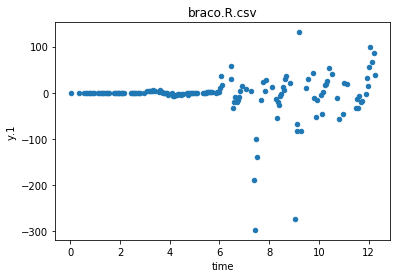

     LinAccel: x            y           z  AngVel: x       y.1        z.1  \
0       0.000134     0.003687    0.000702   0.000000  0.000000   0.000000   
1      -0.000010    -0.000267   -0.000051   0.000000  0.000000   0.000000   
2       0.000003     0.000073    0.000014   0.000000  0.000000   0.000000   
3       0.000008     0.000214    0.000041   0.000000  0.000000   0.000000   
4       0.000056     0.001529    0.000291   0.000000  0.000000   0.000000   
..           ...          ...         ...        ...       ...        ...   
194  -112.238266  -215.746134  101.216233 -10.654165  2.567263 -12.609437   
195  -147.060717  -340.647278   54.807715 -25.896410  2.004498 -26.152551   
196   111.236622   209.970194  -77.444369 -19.963774  0.197476 -20.286815   
197  -186.243775  -476.823265   98.493134 -34.882031 -0.256792 -35.525733   
198  -285.249953 -1046.029678   80.446338 -76.725803 -4.760066 -79.500884   

     Magnetometer: x  y.2  z.2       time         name  
0                 

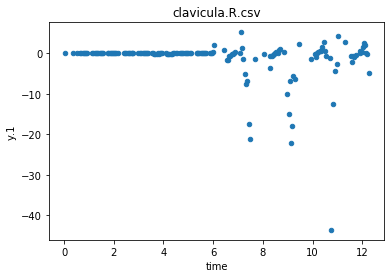

      LinAccel: x           y           z  AngVel: x        y.1        z.1  \
0   -4.570173e-10    0.003385    0.000861   0.000000   0.000000   0.000000   
1    3.310267e-11   -0.000245   -0.000062   0.000000   0.000000   0.000000   
2   -9.096540e-12    0.000067    0.000017   0.000000   0.000000   0.000000   
3   -2.648966e-11    0.000196    0.000050   0.000000   0.000000   0.000000   
4   -1.895021e-10    0.001403    0.000357   0.000000   0.000000   0.000000   
..            ...         ...         ...        ...        ...        ...   
190 -4.620748e+01   29.884933   33.266895  -1.350752  -0.838964  -2.085988   
191 -8.040693e+02  528.277497  591.020295  42.311006  10.794163  59.658642   
192  4.185594e+02 -264.556559 -322.908074  14.127505   4.203991  19.474838   
193 -3.385337e+01  -99.673516 -822.698853 -38.664459  43.421245  54.862070   
197  8.332885e+01 -539.740096   99.097981 -87.279918  15.105967  17.977830   

     Magnetometer: x  y.2  z.2       time      name  
0        

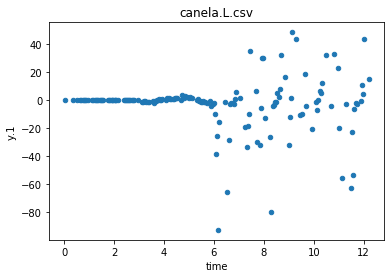

      LinAccel: x            y           z  AngVel: x       y.1       z.1  \
0   -7.847011e-10     0.003660    0.000841   0.000000  0.000000  0.000000   
1    5.683746e-11    -0.000265   -0.000061   0.000000  0.000000  0.000000   
2   -1.561881e-11     0.000073    0.000017   0.000000  0.000000  0.000000   
3   -4.548287e-11     0.000212    0.000049   0.000000  0.000000  0.000000   
4   -3.253761e-10     0.001518    0.000349   0.000000  0.000000  0.000000   
..            ...          ...         ...        ...       ...       ...   
193  9.740556e+00  -183.535094   47.302528  -1.799429  0.124864  0.078371   
196 -8.960955e+00   203.071238  -77.129228 -14.127686 -0.017629 -0.017440   
197  1.586332e+01  -421.279096   68.059555 -24.620451 -0.056128 -0.013944   
198  2.483611e+01  -821.401578   39.688942  51.508661 -0.041191  0.129625   
199 -5.987696e+01  1581.637213 -225.460599 -21.411973  0.095903  0.125105   

     Magnetometer: x  y.2  z.2       time   name  
0                  0    

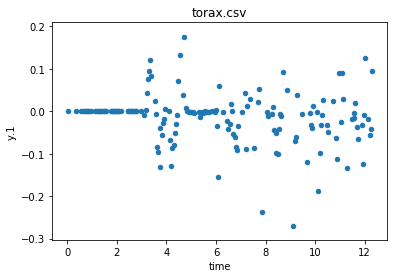

     LinAccel: x           y           z  AngVel: x        y.1         z.1  \
0      -0.001419    0.003831    0.000973   0.000000   0.000000    0.000000   
1       0.000103   -0.000278   -0.000071   0.000000   0.000000    0.000000   
2      -0.000028    0.000076    0.000019   0.000000   0.000000    0.000000   
3      -0.000082    0.000222    0.000056   0.000000   0.000000    0.000000   
4      -0.000588    0.001589    0.000404   0.000000   0.000000    0.000000   
..           ...         ...         ...        ...        ...         ...   
194   -53.498173  -72.302432 -109.297352 -22.900413 -47.278779   53.150732   
195   -21.103623 -240.859786  -65.482722 -18.766551 -62.536599   87.047652   
196   208.984182   31.140558  209.887495   2.509443 -31.128000   72.134366   
197    35.128801 -406.305733  -31.836888  15.160442 -46.219978  123.195490   
198   662.407527 -508.955660   15.689317  47.663869  -4.517518   22.856139   

     Magnetometer: x  y.2  z.2       time         name  
0     

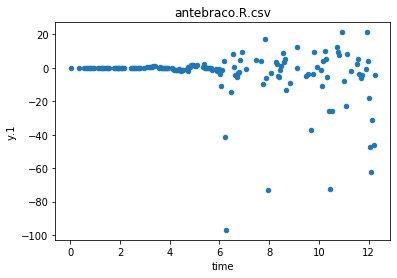

      LinAccel: x            y           z  AngVel: x       y.1       z.1  \
0   -7.847011e-10     0.003660    0.000841   0.000000  0.000000  0.000000   
1    5.683746e-11    -0.000265   -0.000061   0.000000  0.000000  0.000000   
2   -1.561881e-11     0.000073    0.000017   0.000000  0.000000  0.000000   
3   -4.548287e-11     0.000212    0.000049   0.000000  0.000000  0.000000   
4   -3.253761e-10     0.001518    0.000349   0.000000  0.000000  0.000000   
..            ...          ...         ...        ...       ...       ...   
193  9.740556e+00  -183.534998   47.302499  -1.799429  0.124864  0.078371   
196 -8.960955e+00   203.071238  -77.129251 -14.127686 -0.017629 -0.017440   
197  1.586332e+01  -421.278999   68.059458 -24.620451 -0.056128 -0.013944   
198  2.483611e+01  -821.401672   39.689113  51.508661 -0.041191  0.129625   
199 -5.987696e+01  1581.637210 -225.460691 -21.411973  0.095903  0.125105   

     Magnetometer: x  y.2  z.2       time        name  
0                  

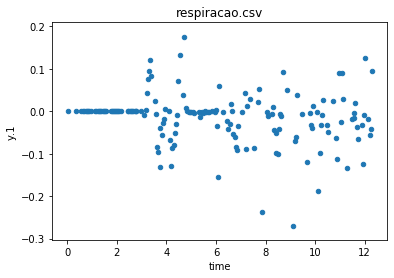

      LinAccel: x            y           z   AngVel: x        y.1        z.1  \
0   -1.613633e-10     0.003497    0.000854    0.000000   0.000000   0.000000   
1    1.168787e-11    -0.000253   -0.000062    0.000000   0.000000   0.000000   
2   -3.211801e-12     0.000070    0.000017    0.000000   0.000000   0.000000   
3   -9.352948e-12     0.000203    0.000049    0.000000   0.000000   0.000000   
4   -6.690927e-11     0.001450    0.000354    0.000000   0.000000   0.000000   
..            ...          ...         ...         ...        ...        ...   
193  2.865345e+01   -85.372243  -95.073418   -4.913847 -32.549379  40.395360   
196  8.445407e+01  -178.146182 -493.528769   72.383615 -27.805491  37.229299   
197  9.128080e+01  -353.348763   23.937353  101.427437 -29.911030  34.267793   
198  4.779960e+02 -1102.500363 -605.177053   84.496090  11.490811 -34.939673   
199 -3.841681e+02  1333.492999  148.026155   33.282350  17.065119 -35.604004   

     Magnetometer: x  y.2  z.2       ti

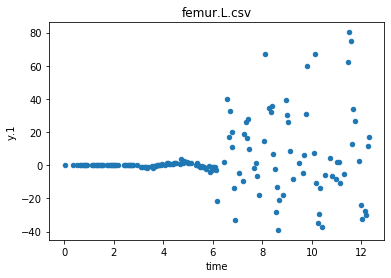

      LinAccel: x            y            z   AngVel: x         y.1  \
0    3.175825e-11     0.001847    -0.002964    0.000000    0.000000   
1   -2.300312e-12    -0.000134     0.000215    0.000000    0.000000   
2    6.321211e-13     0.000037    -0.000059    0.000000    0.000000   
3    1.840772e-12     0.000107    -0.000172    0.000000    0.000000   
4    1.316855e-11     0.000766    -0.001229    0.000000    0.000000   
..            ...          ...          ...         ...         ...   
191 -4.720463e+02  -297.976986   492.864304    4.329801    3.318916   
192  2.486859e+02    81.243045  -235.912899   -0.783287   -1.357669   
193  8.836646e+02  -476.704491 -1879.365567  -84.332998  -62.545076   
194  3.126259e+03  1143.086375 -6900.307147 -346.742444 -152.277956   
198 -1.943223e+03 -1227.039161  4570.604263  -15.976281  -25.712505   

            z.1  Magnetometer: x  y.2  z.2       time  name  
0      0.000000                0    0    0   0.020000  pe.R  
1      0.000000        

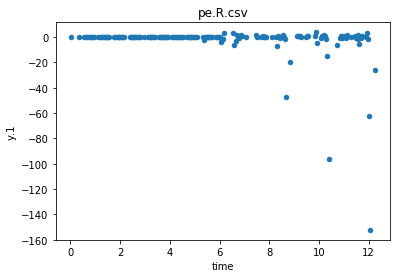

      LinAccel: x            y           z  AngVel: x       y.1       z.1  \
0   -3.500932e-10     0.003402    0.000901   0.000000  0.000000  0.000000   
1    2.535795e-11    -0.000246   -0.000065   0.000000  0.000000  0.000000   
2   -6.968310e-12     0.000068    0.000018   0.000000  0.000000  0.000000   
3   -2.029212e-11     0.000197    0.000052   0.000000  0.000000  0.000000   
4   -1.451660e-10     0.001411    0.000374   0.000000  0.000000  0.000000   
..            ...          ...         ...        ...       ...       ...   
193  9.740527e+00  -183.535195   47.302650  -1.799591  0.124864  0.078371   
196 -8.960933e+00   203.071426  -77.129395 -14.127711 -0.017629 -0.017440   
197  1.586327e+01  -421.279187   68.059744 -24.620501 -0.056128 -0.013944   
198  2.483601e+01  -821.401484   39.688918  51.508660 -0.041191  0.129625   
199 -5.987677e+01  1581.637215 -225.460599 -21.411973  0.095903  0.125105   

     Magnetometer: x  y.2  z.2       time     name  
0                  0  

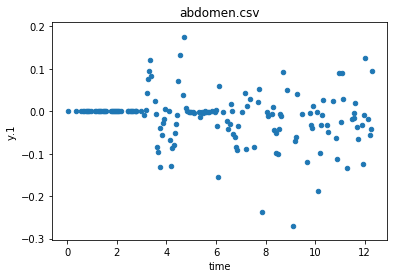

     LinAccel: x            y           z  AngVel: x         y.1         z.1  \
0      -0.003509     0.003057    0.001710   0.000000    0.000000    0.000000   
1       0.000254    -0.000221   -0.000124   0.000000    0.000000    0.000000   
2      -0.000070     0.000061    0.000034   0.000000    0.000000    0.000000   
3      -0.000203     0.000177    0.000099   0.000000    0.000000    0.000000   
4      -0.001455     0.001268    0.000709   0.000000    0.000000    0.000000   
..           ...          ...         ...        ...         ...         ...   
194   -17.970180  -541.176956  138.202777 -30.331572  -22.657346  -38.927223   
195   -50.214765  -553.916300  282.265744 -59.970890  -47.668198  -72.470984   
196    33.114050   495.001833  -81.831879 -38.447269  -40.883292  -46.273346   
197    36.082454  -902.369529  486.175075 -74.508737  -76.944330  -97.311791   
198   146.185744 -1053.845186  872.642596 -93.018940 -132.991580 -117.031415   

     Magnetometer: x  y.2  z.2       ti

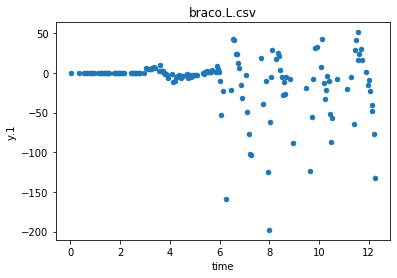

     LinAccel: x            y            z   AngVel: x         y.1  \
0       0.000000     0.000000     0.000000    0.000000    0.000000   
1       0.000000     0.000000     0.000000    0.000000    0.000000   
2       0.000000     0.000000     0.000000    0.000000    0.000000   
3       0.000000     0.000000     0.000000    0.000000    0.000000   
4       0.000000     0.000000     0.000000    0.000000    0.000000   
..           ...          ...          ...         ...         ...   
191  -472.045852  -297.989975   492.859217    4.329801    3.318916   
192   248.684277    81.247215  -235.911887   -0.783287   -1.357592   
193   883.668900  -476.696897 -1879.368447  -84.332998  -62.545151   
194  3126.254677  1143.075933 -6900.300443 -346.742347 -152.278056   
198 -1943.224951 -1227.040783  4570.614453  -15.975732  -25.712712   

            z.1  Magnetometer: x  y.2  z.2       time       name  
0      0.000000                0    0    0   0.020000  pontape.R  
1      0.000000          

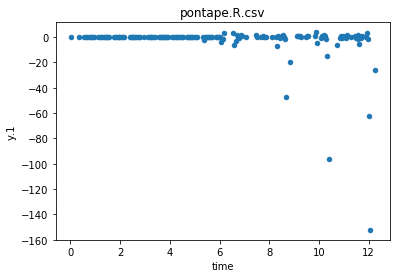

      LinAccel: x            y            z  AngVel: x       y.1       z.1  \
0   -2.381727e-10     0.003611     0.000853   0.000000  0.000000  0.000000   
1    1.725133e-11    -0.000262    -0.000062   0.000000  0.000000  0.000000   
2   -4.740627e-12     0.000072     0.000017   0.000000  0.000000  0.000000   
3   -1.380498e-11     0.000209     0.000049   0.000000  0.000000  0.000000   
4   -9.875828e-11     0.001497     0.000354   0.000000  0.000000  0.000000   
..            ...          ...          ...        ...       ...       ...   
194  2.370174e+00  -129.649936   202.476722 -18.746307  1.052060  0.819870   
195  1.121384e+01  -243.549532   209.548583 -38.202027  1.131680  1.504190   
196 -8.953560e+00   135.505741  -192.881800 -28.508558  0.566739  1.053703   
197  1.723111e+01  -351.195000   285.851418 -49.842148  0.883576  1.799268   
199 -6.491927e+01  1351.000012 -1012.909937 -54.639400  0.850115  1.795842   

     Magnetometer: x  y.2  z.2       time     name  
0         

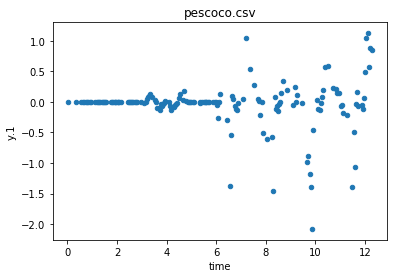

In [278]:
for file in files:
    df = pd.read_csv(file)
    for axis in range(6):
        df = filter_data(df, axis, by_axis=True)
    df.to_csv(path_or_buf="./final_csv/{}".format(file), index=False)
    print(df)
    df.plot(kind="scatter", x="time", y="y.1")
    plt.title(file)
    plt.show()